In [1]:
### Create a Tensor in PyTorch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/sampathweb/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


## The XOR problem

Research into artificial neurons dates to the late 40s, but it was not until 1969 that Martin Minsky and Seymour Papert pointed out that basic neurons were unable to reproduce the **exclusive-or** (XOR) function.  This boolean function of two boolean variables returns true if exactly one of its inputs is true:

$$ \mathrm{XOR}(0, 0) = \mathrm{XOR}(1, 1) = 0 \ \ \ \ \ \ \mathrm{XOR}(0, 1) = \mathrm{XOR}(1, 0) = 1 $$

Below, we create a related two-class classification problem, with one class clustered about (0, 0) and (1, 1), and the other about (0, 1) and (1, 0).  It would be quite easy to draw a boundary separating the two classes by hand.

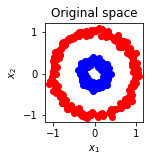

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T


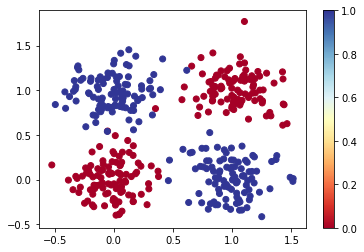

In [10]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100
                   + [[0, 1]] * 100 + [[1, 0]] * 100)
np.random.seed(42)
data = np.random.normal(0, 0.2, (400, 2)) + centers
y = np.array([[0]] * 200 + [[1]] * 200)

plt.scatter(data[:,0], data[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.colorbar();

In [5]:
## Add More Layers to the NN

In [6]:
## Keras

### Add One Hidden Layer - Keras

** Define the Model **

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(4, input_shape=[2], name="hidden"),
    keras.layers.Dense(1, name="Logit"),
    keras.layers.Activation("sigmoid", name="Sigmoid")
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
Logit (Dense)                (None, 1)                 5         
_________________________________________________________________
Sigmoid (Activation)         (None, 1)                 0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


** Run the Model **

In [11]:
model.compile("adam", loss="binary_crossentropy")
hist = model.fit(data, y, epochs=300, verbose=0)

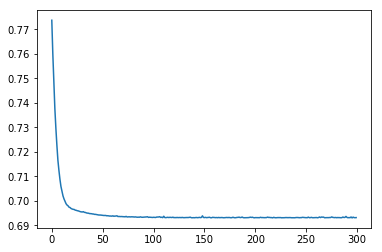

In [12]:
plt.plot(hist.history["loss"])

In [ ]:
mesh = np.column_stack(a.reshape(-1) for a in np.meshgrid(np.r_[-1:2:100j], np.r_[-1:2:100j]))
ymesh = sess.run(tf.nn.sigmoid(y), feed_dict={x: mesh})

plt.imshow(ymesh.reshape(100,100), cmap=plt.cm.RdYlBu, origin='lower',
           extent=(-1, 2, -1, 2), vmin=0, vmax=1)
plt.scatter(data[:, 0], data[:, 1], c=y, cmap=plt.cm.RdYlBu,
            edgecolor='w', lw=1)
plt.axis((-1, 2, -1, 2))
plt.colorbar();

In [14]:
mesh = np.column_stack(a.reshape(-1) for a in np.meshgrid(np.r_[-1:2:100j], np.r_[-1:2:100j]))

mesh

array([[-1.        , -1.        ],
       [-0.96969697, -1.        ],
       [-0.93939394, -1.        ],
       ..., 
       [ 1.93939394,  2.        ],
       [ 1.96969697,  2.        ],
       [ 2.        ,  2.        ]])

In [ ]:
mesh = np.column_stack(a.reshape(-1) for a in np.meshgrid(np.r_[-1:2:100j], np.r_[-1:2:100j]))
ymesh = sess.run(tf.nn.sigmoid(y), feed_dict={x: mesh})

plt.imshow(ymesh.reshape(100,100), cmap=plt.cm.RdYlBu, origin='lower',
           extent=(-1, 2, -1, 2), vmin=0, vmax=1)
plt.scatter(data[:, 0], data[:, 1], c=y, cmap=plt.cm.RdYlBu,
            edgecolor='w', lw=1)
plt.axis((-1, 2, -1, 2))
plt.colorbar();

In [114]:
for layer in model.layers:
    if layer.name == "Logit":
        (w0, w1), bias = layer.get_weights() # list of numpy arrays
        w0, w1, bias = w0[0], w1[0], bias[0]
        print("w0: {:.2f}, w1: {:.2f}, bias: {:.2f}".format(w0, w1, bias))

w0: 2.70, w1: 1.46, bias: -1.56


In [115]:
bias

-1.5601274

In [84]:
w0, w1, bias

(array([ 1.31929326], dtype=float32),
 array([ 1.94551957], dtype=float32),
 array([-1.00816405], dtype=float32))

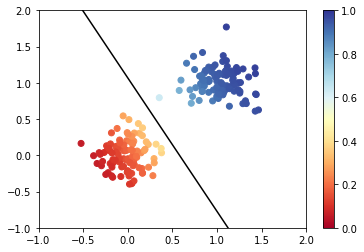

In [116]:
pred_labels = model.predict(data)

plt.scatter(data[:,0], data[:,1], c=pred_labels, cmap=plt.cm.RdYlBu,
            vmin=0.0, vmax=1)
xx = np.linspace(-1, 2, 100)

yy = -w0 / w1 * xx - bias / w1
plt.plot(xx, yy, 'k')
plt.axis((-1,2,-1,2))
plt.colorbar();

## TensorFlow

In [137]:
g = tf.Graph()

with g.as_default():
    x_data = tf.placeholder(tf.float32, [None, 2], name="features")
    y_label = tf.placeholder(tf.float32, [None, 1], name="labels")

    W = tf.Variable(tf.truncated_normal([2, 1]), name="weights")
    b = tf.Variable(tf.zeros([1]), name="biases")
    logits = tf.matmul(x_data, W) + b

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, 
                                                                  labels=y_label))
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

    predicted = tf.cast(tf.nn.sigmoid(logits) > 0.5, np.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_label), np.float32))

In [140]:
nb_epochs = 200
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(nb_epochs):
        sess.run(train_op, feed_dict={x_data: data, y_label: y})

    pred_labels = sess.run(tf.nn.sigmoid(logits), feed_dict={x_data: data, y_label: y})
    ww, bb = sess.run([W, b])

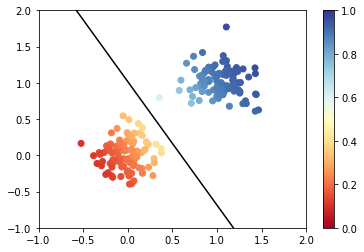

In [142]:
plt.scatter(data[:,0], data[:,1], c=pred_labels, cmap=plt.cm.RdYlBu,
            vmin=0.0, vmax=1.0)
xx = np.linspace(-1, 2, 100)
yy = -ww[0] / ww[1] * xx - bb / ww[1]
plt.plot(xx, yy, 'k')
plt.axis((-1,2,-1,2))
plt.colorbar();

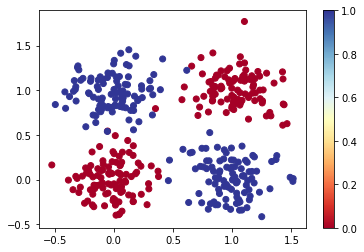

In [19]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100
                   + [[0, 1]] * 100 + [[1, 0]] * 100)
np.random.seed(42)
data = np.random.normal(0, 0.2, (400, 2)) + centers
labels = np.array([[0]] * 200 + [[1]] * 200)

plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.RdYlBu)
plt.colorbar();

In [77]:
## Simple function of X
X = Variable(torch.rand(10, 1))
X

Variable containing:
 0.6577
 0.2442
 0.9040
 0.7817
 0.2349
 0.5712
 0.6392
 0.0651
 0.0490
 0.3022
[torch.FloatTensor of size 10x1]

In [10]:
y = Variable(5 * X.data + torch.rand(10))

In [11]:
y

Variable containing:
 3.6616
 1.2762
 4.0995
 4.7824
 3.5224
 4.8635
 2.3666
 4.5147
 0.6733
 4.6887
[torch.FloatTensor of size 10x1]

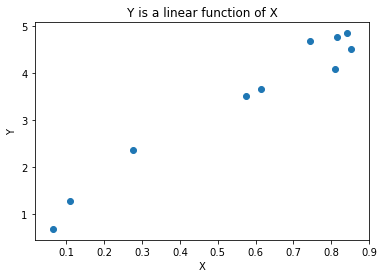

In [12]:
plt.scatter(X.data.numpy(), y.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y is a linear function of X");

In [13]:
torch.mm(X, w)

NameError: name 'w' is not defined

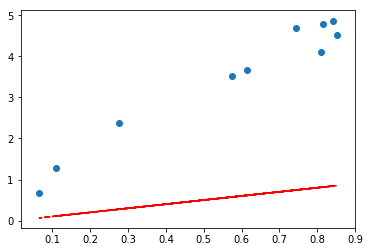

In [14]:
w = Variable(torch.ones(1, 1), requires_grad=True)

def plot_torch_linear_xy(X, y, y_est=None):
    plt.scatter(X.data.numpy(), y.data.numpy())
    if y_est is not None:
        plt.plot(X.data.numpy(), y_est.data.numpy(), 'r--')
    # y_est = w
    

y_est = torch.mm(X, w)
plot_torch_linear_xy(X, y, y_est)

In [15]:
w_delta

NameError: name 'w_delta' is not defined

In [16]:
torch.z

AttributeError: module 'torch' has no attribute 'z'

In [23]:
# dy/dw = val of x

lr = 0.01

y_est = torch.mm(X, w)

loss = ((y - y_est) ** 2).mean()

# loss.grad.zero()
# Backpropogate to compute gradients w.r.t. loss
loss.backward(retain_variables=True)

# Update the parameters
w = w - lr * w.grad
print(w.grad)

plot_torch_linear_xy(X, y, y_est)

RuntimeError: calling backward on a volatile variable

## The XOR problem

Research into artificial neurons dates to the late 40s, but it was not until 1969 that Martin Minsky and Seymour Papert pointed out that basic neurons were unable to reproduce the **exclusive-or** (XOR) function.  This boolean function of two boolean variables returns true if exactly one of its inputs is true:

$$ \mathrm{XOR}(0, 0) = \mathrm{XOR}(1, 1) = 0 \ \ \ \ \ \ \mathrm{XOR}(0, 1) = \mathrm{XOR}(1, 0) = 1 $$

Below, we create a related two-class classification problem, with one class clustered about (0, 0) and (1, 1), and the other about (0, 1) and (1, 0).  It would be quite easy to draw a boundary separating the two classes by hand.